In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/No Outlier (1)/Players (1).csv")

In [4]:
df.head()

,Apps,Mins/Gm,Height,Weight,Age,Av Rat,Gls,Shot %,Pen/R,xG,...,Int/90,Clear,PoM,Off,Based,Tck R,CA,Gls/xG,Dist/Mins,Value
0,12.0,67.416667,173.0,68.0,20,7.14,1.0,0.67,0.0,0.18,...,1.45,24.0,1.0,0.0,Croatia (3. HNL Zapad),0.88,84,5.555556,0.126823,6000.0
1,15.0,77.400000,172.0,69.0,25,6.84,0.0,0.38,0.0,0.56,...,1.47,46.0,0.0,0.0,Croatia (3. HNL Jug),0.76,79,0.000000,0.129457,1250.0
2,15.0,90.000000,170.0,62.0,22,6.90,0.0,0.10,0.0,3.31,...,2.93,78.0,1.0,0.0,Croatia (3. HNL Jug),0.77,87,0.000000,0.128000,6000.0
3,20.0,86.900000,192.0,86.0,22,7.15,1.0,0.30,0.0,0.42,...,1.40,74.0,1.0,1.0,Bosnia & Herzegovina (Liga 12),0.88,95,2.380952,0.058631,550000.0
4,15.0,92.266667,190.0,77.0,19,7.23,4.0,0.33,0.0,0.00,...,0.39,16.0,0.0,0.0,Croatia (3. HNL Istok),0.93,83,0.000000,0.016040,82000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Apps       941 non-null    float64
 1   Mins/Gm    941 non-null    float64
 2   Height     941 non-null    float64
 3   Weight     941 non-null    float64
 4   Age        941 non-null    int64  
 5   Av Rat     941 non-null    float64
 6   Gls        941 non-null    float64
 7   Shot %     941 non-null    float64
 8   Pen/R      941 non-null    float64
 9   xG         941 non-null    float64
 10  Ch C/90    941 non-null    float64
 11  Asts/90    941 non-null    float64
 12  K Ps/90    941 non-null    float64
 13  Pas %      941 non-null    float64
 14  Cr C/A     941 non-null    float64
 15  Drb/90     941 non-null    float64
 16  Distance   941 non-null    float64
 17  Hdr %      941 non-null    float64
 18  K Tck      941 non-null    float64
 19  Fls        941 non-null    float64
 20  Int/90    

In [6]:
df.drop(['Pen/R', 'xG', 'Clear', 'Based', 'Gls/xG'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Apps       941 non-null    float64
 1   Mins/Gm    941 non-null    float64
 2   Height     941 non-null    float64
 3   Weight     941 non-null    float64
 4   Age        941 non-null    int64  
 5   Av Rat     941 non-null    float64
 6   Gls        941 non-null    float64
 7   Shot %     941 non-null    float64
 8   Ch C/90    941 non-null    float64
 9   Asts/90    941 non-null    float64
 10  K Ps/90    941 non-null    float64
 11  Pas %      941 non-null    float64
 12  Cr C/A     941 non-null    float64
 13  Drb/90     941 non-null    float64
 14  Distance   941 non-null    float64
 15  Hdr %      941 non-null    float64
 16  K Tck      941 non-null    float64
 17  Fls        941 non-null    float64
 18  Int/90     941 non-null    float64
 19  PoM        941 non-null    float64
 20  Off       

In [8]:
df.describe()

,Apps,Mins/Gm,Height,Weight,Age,Av Rat,Gls,Shot %,Ch C/90,Asts/90,...,Hdr %,K Tck,Fls,Int/90,PoM,Off,Tck R,CA,Dist/Mins,Value
count,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,...,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,9.410000e+02
mean,15.128587,86.558363,183.463337,76.773645,26.109458,7.019288,0.876727,0.260606,0.293326,0.092094,...,0.746461,1.373007,17.055260,1.887088,0.599362,1.197662,0.816366,117.989373,0.114771,1.075761e+07
std,5.699519,5.751001,6.538429,7.078645,3.322029,0.209081,1.198270,0.184420,0.431767,0.107312,...,0.109724,1.537501,9.777478,0.931352,0.893213,1.688268,0.126116,19.845893,0.031094,2.546099e+07
min,11.000000,63.000000,161.000000,56.000000,18.000000,6.360000,0.000000,0.000000,0.000000,0.000000,...,0.220000,0.000000,2.000000,0.000000,0.000000,0.000000,0.200000,70.000000,0.000930,7.500000e+02
25%,12.000000,83.750000,179.000000,72.000000,24.000000,6.880000,0.000000,0.130000,0.000000,0.000000,...,0.700000,0.000000,11.000000,1.080000,0.000000,0.000000,0.750000,104.000000,0.111037,1.800000e+05
50%,14.000000,88.142857,184.000000,77.000000,26.000000,7.010000,0.000000,0.250000,0.150000,0.070000,...,0.770000,1.000000,15.000000,1.950000,0.000000,1.000000,0.830000,117.000000,0.119330,1.320000e+06
75%,16.000000,90.000000,188.000000,81.000000,28.000000,7.150000,1.000000,0.380000,0.360000,0.140000,...,0.820000,2.000000,21.000000,2.660000,1.000000,2.000000,0.910000,130.000000,0.135765,6.900000e+06
max,50.000000,115.363636,204.000000,106.000000,39.000000,8.170000,9.000000,1.000000,3.840000,0.650000,...,1.000000,8.000000,84.000000,4.420000,8.000000,13.000000,1.000000,177.000000,0.160410,3.040000e+08


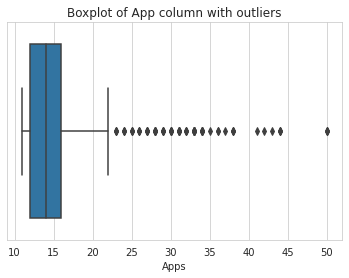

In [9]:


# Assume 'df' is the DataFrame and 'App' is the column we want to plot

sns.set_style('whitegrid')
sns.boxplot(x=df['Apps'])
plt.title('Boxplot of App column with outliers')
plt.show()

In [10]:
df[df['Apps']>23]

,Apps,Mins/Gm,Height,Weight,Age,Av Rat,Gls,Shot %,Ch C/90,Asts/90,...,Hdr %,K Tck,Fls,Int/90,PoM,Off,Tck R,CA,Dist/Mins,Value
133,38.0,90.000000,194.0,81.0,27,7.03,1.0,0.22,0.00,0.05,...,0.83,1.0,45.0,0.55,1.0,1.0,0.91,105,0.027719,880000.0
141,30.0,88.800000,180.0,78.0,29,6.92,2.0,0.13,0.00,0.10,...,0.69,0.0,34.0,0.51,0.0,1.0,0.95,101,0.020646,262500.0
207,28.0,91.107143,174.0,64.0,24,7.09,1.0,0.40,0.36,0.07,...,0.71,0.0,25.0,0.28,0.0,0.0,0.86,106,0.032497,83000.0
255,34.0,87.941176,176.0,75.0,25,6.84,0.0,0.00,0.12,0.03,...,0.66,5.0,44.0,2.14,0.0,3.0,0.95,113,0.112709,1155000.0
275,44.0,84.409091,177.0,58.0,27,6.75,1.0,0.29,0.57,0.10,...,0.66,0.0,34.0,0.70,0.0,0.0,0.88,107,0.067071,6750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,33.0,90.000000,161.0,59.0,28,6.88,2.0,0.34,0.06,0.06,...,0.56,0.0,26.0,0.45,0.0,0.0,0.68,126,0.053771,5400000.0
816,28.0,88.107143,185.0,76.0,28,6.95,0.0,0.00,0.11,0.04,...,0.79,2.0,72.0,2.30,0.0,13.0,0.88,119,0.131090,6050000.0
820,30.0,85.233333,177.0,73.0,26,7.21,5.0,0.31,0.68,0.21,...,0.74,0.0,37.0,0.84,3.0,0.0,0.80,131,0.111537,4825000.0
898,33.0,87.454545,185.0,85.0,35,7.21,1.0,0.20,0.28,0.16,...,0.78,0.0,30.0,0.87,2.0,0.0,0.82,120,0.101074,277500.0


In [11]:
df.head()

,Apps,Mins/Gm,Height,Weight,Age,Av Rat,Gls,Shot %,Ch C/90,Asts/90,...,Hdr %,K Tck,Fls,Int/90,PoM,Off,Tck R,CA,Dist/Mins,Value
0,12.0,67.416667,173.0,68.0,20,7.14,1.0,0.67,0.00,0.22,...,0.73,0.0,13.0,1.45,1.0,0.0,0.88,84,0.126823,6000.0
1,15.0,77.400000,172.0,69.0,25,6.84,0.0,0.38,0.08,0.39,...,0.71,0.0,19.0,1.47,0.0,0.0,0.76,79,0.129457,1250.0
2,15.0,90.000000,170.0,62.0,22,6.90,0.0,0.10,0.14,0.00,...,0.79,7.0,21.0,2.93,1.0,0.0,0.77,87,0.128000,6000.0
3,20.0,86.900000,192.0,86.0,22,7.15,1.0,0.30,0.00,0.26,...,0.80,2.0,17.0,1.40,1.0,1.0,0.88,95,0.058631,550000.0
4,15.0,92.266667,190.0,77.0,19,7.23,4.0,0.33,0.00,0.13,...,0.63,0.0,14.0,0.39,0.0,0.0,0.93,83,0.016040,82000.0


In [12]:
X = df.drop("CA",axis=1)   
y = df["CA"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42)

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
gbr = GradientBoostingRegressor()

In [16]:
param_grid = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [1, 3, 5],
              'min_samples_split': [2, 4, 6],
              'max_features': [None, 'sqrt', 'log2']}

In [17]:
grid = GridSearchCV(gbr, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [1, 3, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]})

In [18]:
best_params = grid.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'max_features': None, 'min_samples_split': 6, 'n_estimators': 100}


In [19]:
gbr = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 3, max_features= None, min_samples_split= 6, n_estimators= 100)#**best_params
gbr.fit(X_train, y_train)

GradientBoostingRegressor(min_samples_split=6)

In [20]:
y_pred = gbr.predict(X_test)

In [21]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  6.791527212887684


In [22]:
r2 = r2_score(y_test, y_pred)
print("R^2 Score: ", r2)

R^2 Score:  0.8732512161646004


In [23]:
r2 = r2_score(y_test, y_pred)
print("R^2 Score: ", r2)

# Calculate the number of samples
n = y_test.shape[0]

# Calculate the number of features
k = X_test.shape[1]

# Calculate adjusted R^2 score
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("Adjusted R^2 Score: ", adj_r2)

R^2 Score:  0.8732512161646004
Adjusted R^2 Score:  0.8588342928847446


In [24]:
from sklearn.metrics import mean_absolute_error

...

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  4.924462755226481


In [25]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [26]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [50, 100, 150],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [1, 5, 10]}

In [27]:
xgb = XGBRegressor()

In [28]:
grid = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_absolute_error')

In [29]:
grid.fit(X_train, y_train)

[05:53:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:53:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:53:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:53:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:53:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:53:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:53:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:53:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'reg_lambda': [1, 5, 10]},
             scoring='neg_mean_absolute_error')

In [30]:
print('Best parameters found by GridSearchCV:', grid.best_params_)

Best parameters found by GridSearchCV: {'gamma': 0.1, 'learning_rate': 0.15, 'max_depth': 3, 'n_estimators': 50, 'reg_lambda': 1}


In [31]:
xgb_best = XGBRegressor( max_depth=grid.best_params_['max_depth'], 
                        learning_rate=grid.best_params_['learning_rate'], 
                        n_estimators=grid.best_params_['n_estimators'], 
                        gamma=grid.best_params_['gamma'],
                        reg_lambda=grid.best_params_['reg_lambda'])

In [32]:
xgb_best.fit(X_train, y_train)

[05:56:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(gamma=0.1, learning_rate=0.15, n_estimators=50)

In [33]:
y_pred = xgb_best.predict(X_test)

In [34]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [35]:
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)
print('Adjusted R2 Score:', adj_r2)
print('RMSE:', rmse)

Mean Absolute Error: 4.965240187564139
R2 Score: 0.8710742497806017
Adjusted R2 Score: 0.8564097094712861
RMSE: 6.8496026475580996


In [36]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error,: ", mse,)

Mean Squared Error,:  46.91705642943492


In [37]:
C = df.drop("CA",axis=1)

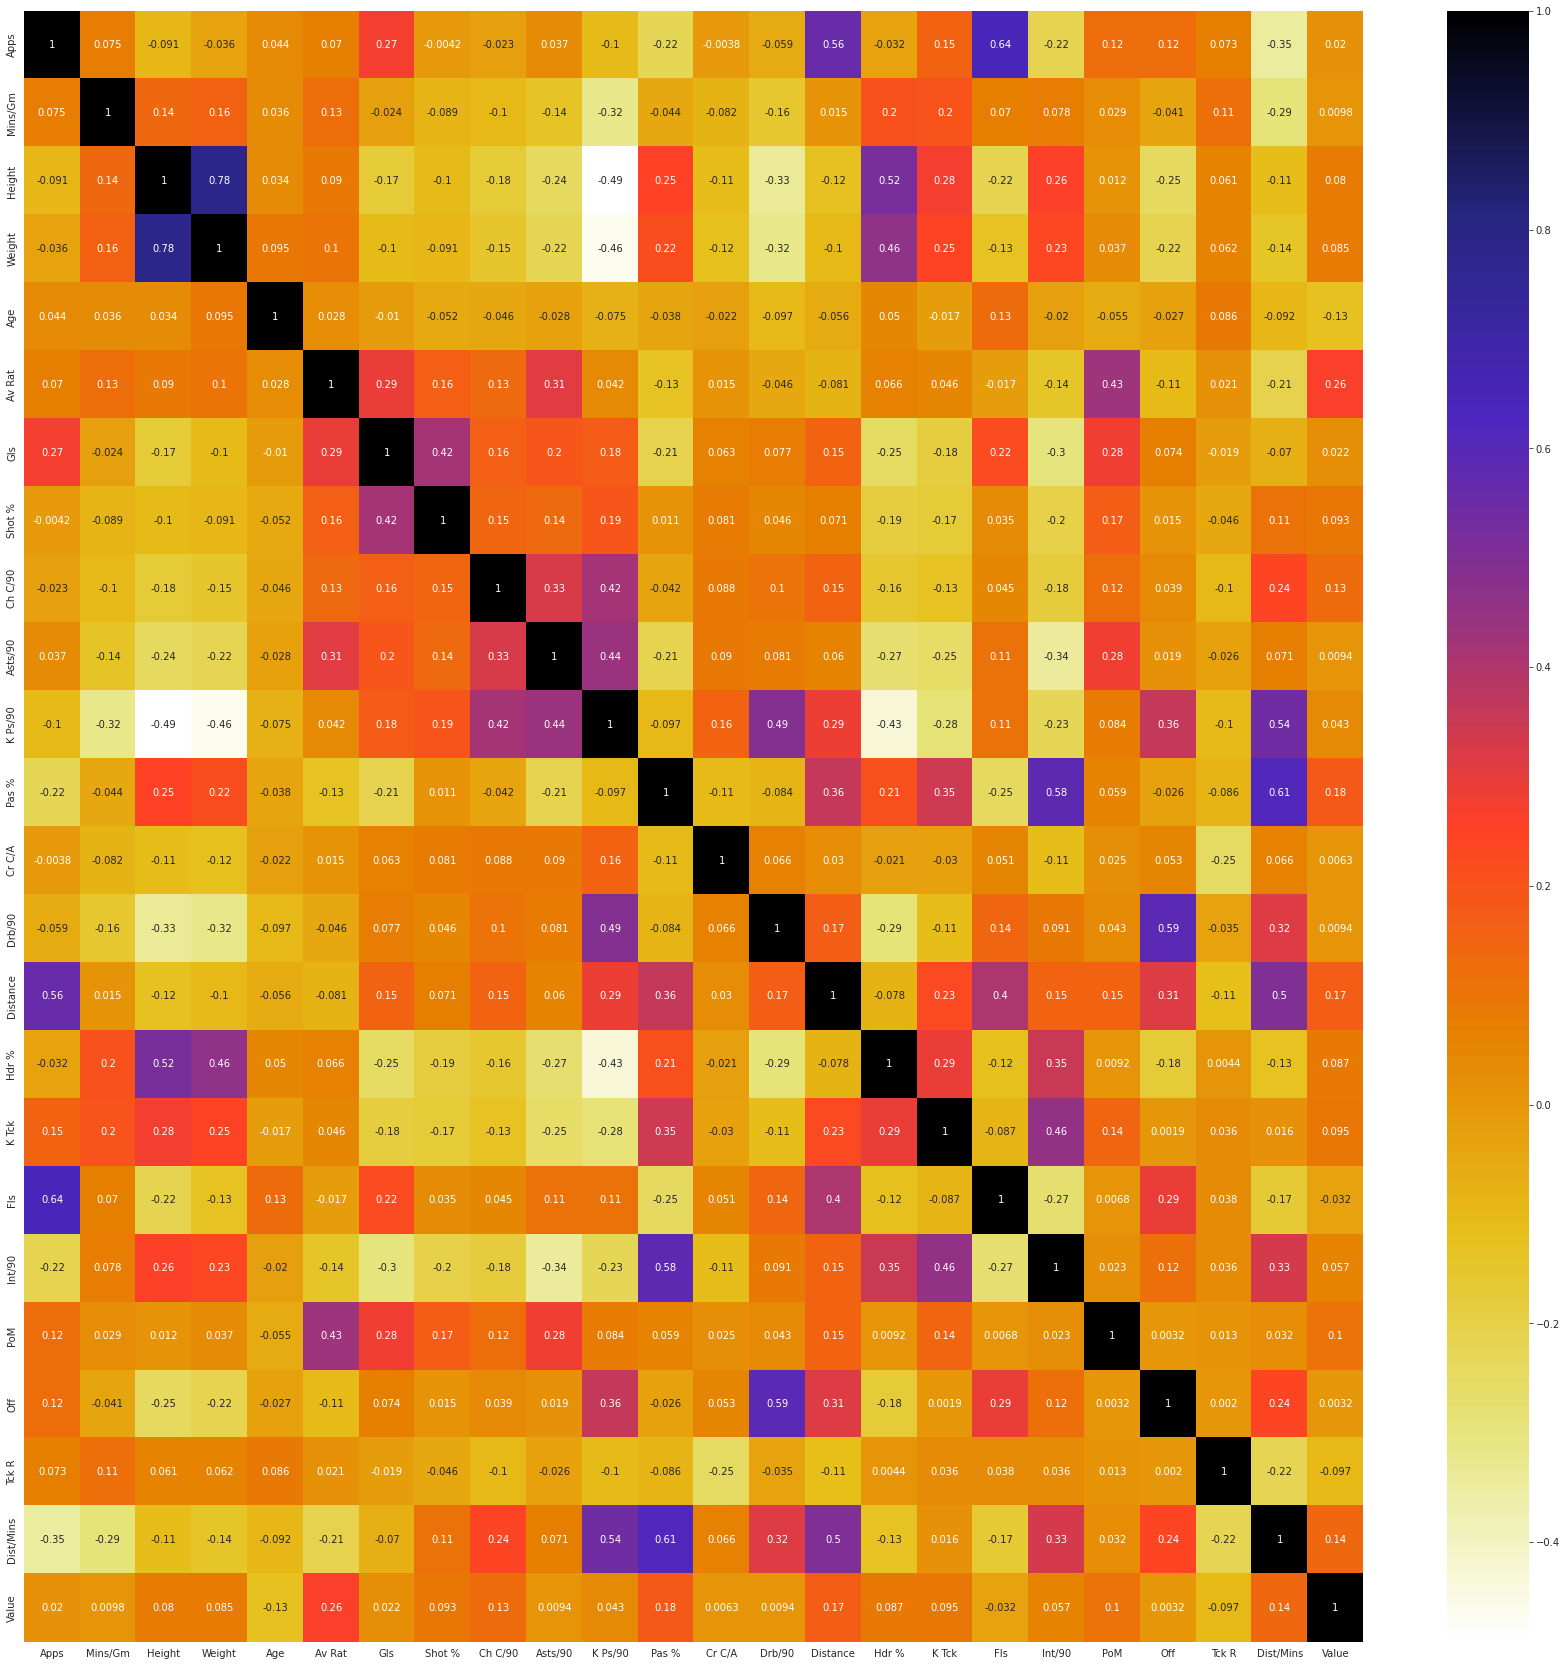

In [38]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = C.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [39]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [40]:
corr_features = correlation(C, 0.75)
len(set(corr_features))

1

In [41]:
corr_features

{'Weight'}

In [42]:
FINAL_gbr = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 3, max_features= None, min_samples_split= 6, n_estimators= 100)#**best_params

FINAL_gbr.fit(X_train, y_train)

GradientBoostingRegressor(min_samples_split=6)

In [43]:
y_pred = FINAL_gbr.predict(X_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


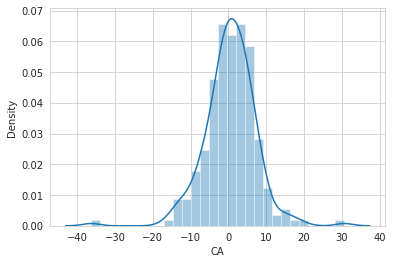

In [54]:
sns.distplot(y_test-y_pred)

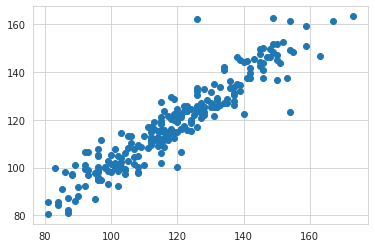

In [56]:
plt.scatter(y_test,y_pred)

In [44]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  6.75844111466907


In [45]:
r2 = r2_score(y_test, y_pred)
print("R^2 Score: ", r2)

R^2 Score:  0.8744831652096801


In [46]:
r2 = r2_score(y_test, y_pred)
print("R^2 Score: ", r2)

# Calculate the number of samples
n = y_test.shape[0]

# Calculate the number of features
k = X_test.shape[1]

# Calculate adjusted R^2 score
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("Adjusted R^2 Score: ", adj_r2)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

R^2 Score:  0.8744831652096801
Adjusted R^2 Score:  0.8602063688354257
Mean Absolute Error:  4.90082694991916


In [48]:
import pickle 
pickle.dump(FINAL_gbr,open('model_PLayers.pkl','wb'))

In [49]:
pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
cd /content/drive/MyDrive/Project

/content/drive/MyDrive/Project


In [51]:
from flask_ngrok import run_with_ngrok